In [11]:
import numpy as np
import matplotlib.pyplot as plt
"""
Calculate the integral of 

e^(-x^2)

from 0 to 3


Using the 1) Rectangle rule, 2) the Trapezoid rule, 
and 3) The Simpson rule
"""

#First we create the rectangular rule through a function:
#The baseline functions for rectangle, trapezoid, and simpson
#was taken from lecture 05 of qzhu/compphysics300       

def Rectangle(start, end, parts, plot=1):
    """
    Rectrangle sum rule
    
    """
    #define the function
    f = lambda x: np.exp(-(x**2))  
    
    #define the X,Y points
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts)
    resultsy = f(resultsx)
    
    # To calculate the area
    area = np.empty([parts], float)
    for i in range(parts):
            area[i] = resultsy[i] * deltax
    

    # By default, we also output the plot.
    if plot==1:
        x = np.linspace(start,end,100)
        y = np.exp(-(x**2))        
        plt.plot(x, y, 'r')
        #plt.xlim([start,end])
        plt.bar(resultsx+deltax/2, resultsy, deltax, edgecolor ='black')
        #plt.bar(resultsx, resultsy, deltax, edgecolor ='black')
        plt.show()
        print("The Sum of the area is: ", sum(area))
    
    return sum(area)
    


In [13]:
#Grabbed from Qzhu/comphysics300/lecture05

def Trapezoid(start, end, parts, plot=1):
    """
    Trapezoid sum rule
    
    """
    #define the function
    f = lambda x: np.exp(-(x**2))  
    
    #define the X, Y points 
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts+1)
    resultsy = f(resultsx)

    # To calculate the area
    area = np.empty([parts], float)
    for i in range(parts):
            area[i] = (resultsy[i]+resultsy[i+1]) * deltax/2

    # By default, we also output the plot.
    if plot==1:
        x = np.linspace(start,end,100)
        y = f(x)        
        plt.plot(x, y, 'r')
        plt.xlim([start,end])
        
        y2 = np.array([0,0])
        for i in range(parts):
            x0 = resultsx[i:i+2]
            y1 = resultsy[i:i+2]
            plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='blue')
            linex, liney = [resultsx[i+1], resultsx[i+1]], [0, resultsy[i+1]]
            plt.plot(linex, liney, color='black', linewidth=2.0)        
        
        plt.show()
        print("The Sum of the area is: ", sum(area))
    
    return sum(area)

In [142]:


def Simpson(start, end, parts, plot=1):
    """
    Simpson sum rule
    
    """
    #define the function
    f = lambda x: np.exp(-(x**2))  
    
    #define the X, Y points 
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts+1)
    resultsy = f(resultsx)

    print(resultsy.shape)
    #-----------------------------------------------------
    #define the Simpson points and calculate the area here
    #-----------------------------------------------------
    area = np.empty([parts], float)
    
    for i in range (parts):
        if i == 0 or i == parts-1:
            area[i] = resultsy[i]       
        elif i %2 == 1:
            area[i] = resultsy[i]*4
        elif i%2 == 0:
            area[i] = resultsy[i]*2
            
    
    area *= deltax/3

    #By default, we also output the plot.
    if plot==1:
        x = np.linspace(start,end,100)
        y = f(x)        
        plt.plot(x, y, 'r')
        
        #-----------------------------------------------------
        #draw the curves based on Simpson points here
        #-----------------------------------------------------
        y2 = np.zeros([parts+1])
        plt.plot(resultsx, resultsy, 'b')
        plt.fill_between(resultsx, resultsy, y2, facecolor="grey")
        
        for i in range(parts):
            linex, liney = [resultsx[i+1], resultsx[i+1]], [0, resultsy[i+1]]
            plt.plot(linex, liney, color='black', linewidth=2.0)
    
        plt.xlim([start,end])
        plt.ylim([min(y),max(y)])
        plt.show()
    
    return sum(area)

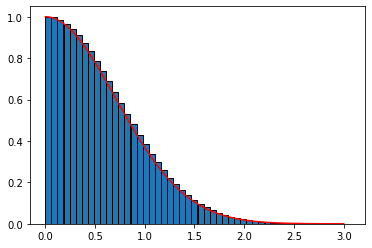

The Sum of the area is:  0.8984866773414126


0.8984866773414126

In [143]:
Rectangle(0,3, 50)

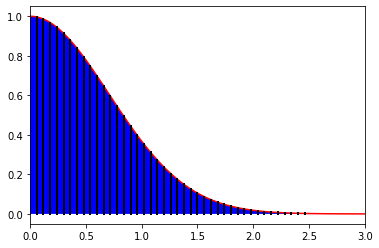

The Sum of the area is:  0.8862071265209955


0.8862071265209955

In [144]:
Trapezoid(0,3,50)

(51,)


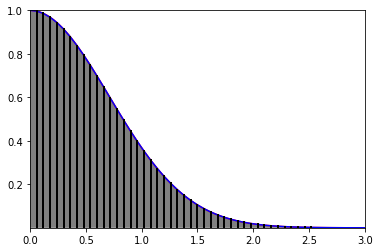

0.8861943034032688

In [149]:
Simpson(0,3, 50)